<a href="https://colab.research.google.com/github/DongWooLeee/Tobigs19/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_19%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('./drive/MyDrive/과제/assignment3_creditcard.csv')


Mounted at /content/drive


In [2]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [3]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [5]:
data.isnull().sum() #결측값 없음

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

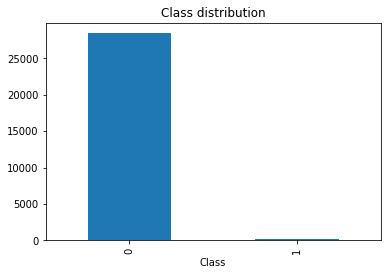

In [6]:
#task: check out if it is fraud transaction or not
#check if it's a imbalanced data
data.pivot_table(index='Class', aggfunc='size').plot(kind='bar',title = 'Class distribution')

In [7]:
y = data.Class
X = data.drop(['Class'],axis=1)

In [8]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058,0
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848,0
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035,0
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999,0


확실히 fraud case가 적음을 알 수 있다.이에 유의하여 진행.

성능개선 하기 전, 그냥 raw data에 회귀분석 진행 후 성능 확인을 진행해보자

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y )


Baseline model

In [10]:
#모델인스턴스
model = LogisticRegression()
model.fit(X_train, y_train)
#predict
preds = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.997907949790795

Accuracy metric은, 여기서 놀랍게도 아무런 전처리 및 하이퍼파라미터튜닝을 하지 않았는데도 99%에 가까운 성능을 보인다.

이에 대한 해석을 잠시 해보자면 다음과 같다.

현재 우리가 가지고 있는 data는 심하게 imbalanced data이다 
Accuracy의 정의를 떠올려보면, 

ACCURACY = # of correct predictions / # of total predicitions이다.

Accuracy는, classifcation tast에서 class별로 거의 비슷한 distribution을 가지는 경우에서 좋은 metric이다.

모델 입장에서는, 우리가 가진 데이터와 같이 심히 편중된 분포를 가지는 데이터를 주고 예측을 하라고 하면 당연히 다 majority class로 예측을 하는 것이 훨씬 편한 방법일 것이다.

여기서 중요한 objective는, minority class인 친구들을 맞춰야한다는 것이기 때문에, 다른 metric에 대한 고려가 필요하다

Imbalanced data를 가지고 classifcation 문제를 풀기 위해서는 resampling 을 통해(동등한 distribution을 가지도록 resample, e.g.Undersampling, Oversampling, SMOTE (Augumentation) 해결하거나

혹은 Accuracy metric 말고 다른 metric(recall, precision, f1score)등의 지표들로서 모델을 평가하는 방법이 있다.

모델 성능 개선을 위해, 다른 지표들로도 baseline 모델의 성능을 보자

In [12]:
from sklearn.metrics import precision_score, recall_score
print('Precision is: ', precision_score(y_test, preds))
print('Recall is: ', recall_score(y_test, preds))

Precision is:  0.9743589743589743
Recall is:  0.7755102040816326


In [13]:
from sklearn.metrics import *

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

p = fn + tp
n = tn + fp

In [15]:
#precision:Positive 예측한 데이터 중 실제 positive 인 비율
precision = tp/ (tp + fp)
print("Precision : ", precision)
#recall:원래 positive 중 에서 positive 로 분류된 비율
recall = (tp) / p
print("Recall : ", recall) #직접계산

Precision :  0.9743589743589743
Recall :  0.7755102040816326


precision의 경우, 모델이 Positive라고 예측한 비율 중 True positive의 비율을 의미한다.

Recall은, 실제 Positive 데이터 중 Positive라고 예측한 비율을 의미한다.

(Precision과 Recall은 tradeoff 관계)

두 지표 모두 모델의 성능을 확인하는데 중요하며, 이를 조화 평균한 값인 f1score도 확인할 필요가 있다.



In [16]:
from sklearn.metrics import f1_score
print('F1Score is: ', f1_score(y_test, preds))
#실제로 이러한 imbalanced 한 class에서의 classification문제를 풀때 f1score을 많이 사용한다.

F1Score is:  0.8636363636363635


In [17]:
data.Class.value_counts()

0    28432
1      246
Name: Class, dtype: int64

#모델성능개선

Improve model with thresholds

불균형한 데이터, 특히 0이 압도적으로 많은 상황이다. Recall과 precision을 적절히 조화평균한 f1score을 높이는 방향으로 모델성능을 개선시도해보자.



In [18]:
from sklearn.metrics import *
from plotnine import *


In [33]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:,1]

threshold 조정을 통해 성능개선을 시도하였습니다. threshold를 0.0001 단위로 쪼개어, 10000개의 testing을 진행하는 grid-search 방식의 코드가 있어 적용해보았습니다.

출처: https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293

Length of sequence: 10000
Best Threshold: 0.0799 with F-Score: 0.8776


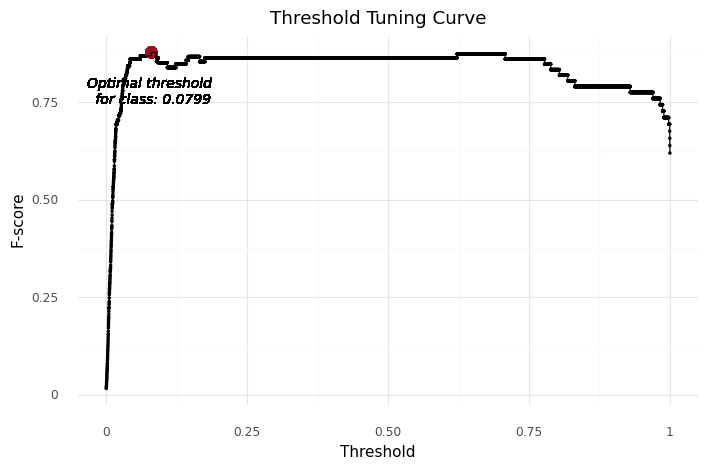

<ggplot: (8733909861855)>

In [38]:
import plotnine
# Array for finding the optimal threshold
thresholds = np.arange(0.0, 1.0, 0.0001)
fscore = np.zeros(shape=(len(thresholds)))
print('Length of sequence: {}'.format(len(thresholds)))

# Fit the model
for index, elem in enumerate(thresholds):
    # Corrected probabilities
    y_pred_prob = (y_pred > elem).astype('int')
    # Calculate the f-score
    fscore[index] = f1_score(y_test, y_pred_prob)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))

# Plot the threshold tuning
df_threshold_tuning = pd.DataFrame({'F-score':fscore,
                                    'Threshold':thresholds})
df_threshold_tuning.head()

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_threshold_tuning)+
    geom_point(aes(x = 'Threshold',
                   y = 'F-score'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = thresholdOpt,
                   y = fscoreOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Threshold',
                   y = 'F-score'))+
    # Annotate the text
    geom_text(aes(x = thresholdOpt,
                  y = fscoreOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Threshold Tuning Curve')+
    xlab('Threshold')+
    ylab('F-score')+
    theme_minimal()
)


In [39]:
y_predict_prob = model.predict_proba(X_test)
y_predict_prob_class_1 = y_predict_prob[:,1]
y_predict_class = [1 if prob > 0.0799 else 0 for prob in y_predict_prob_class_1]
print("F1Score:", f1_score(y_test, y_predict_class))
#미약하게나마 개선된 모습을 보입니다.

F1Score: 0.8775510204081631
